In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
img_dir='/Users/woori/Screenshots'

In [9]:
import pathlib
image_root=pathlib.Path(img_dir)
for item in image_root.glob("*"):
    print(item.name)

death
normal


In [10]:
image_count=len(list(image_root.glob('*/*.png')))
print(image_count)

800


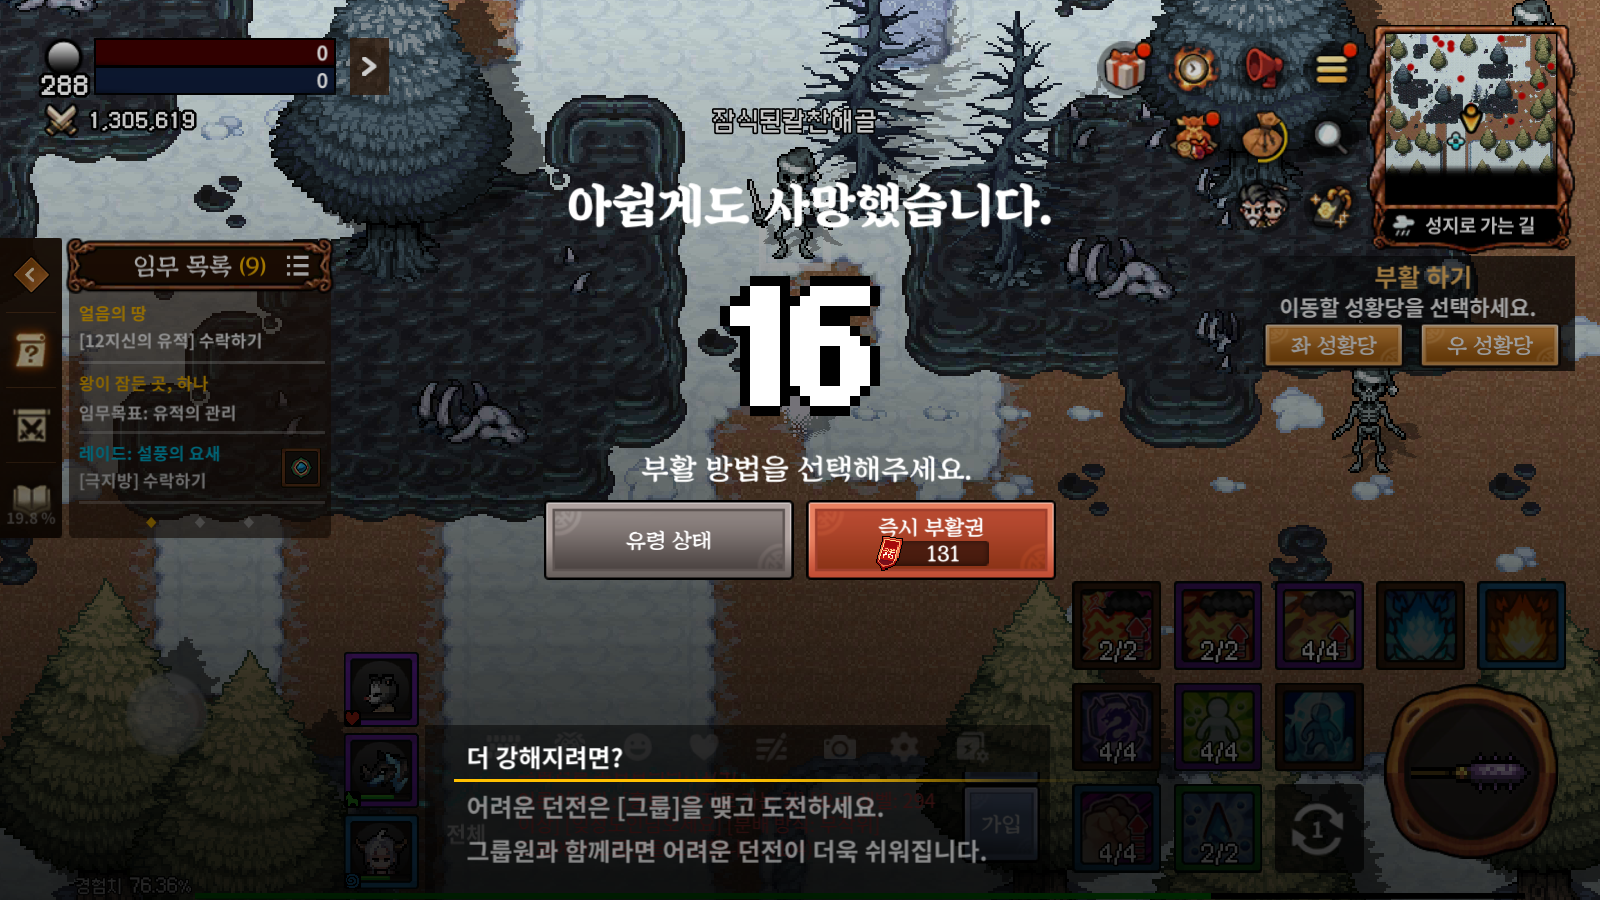

In [11]:
death=list(image_root.glob('death/*'))
normal=list(image_root.glob('normal/*'))
PIL.Image.open(str(death[0]))

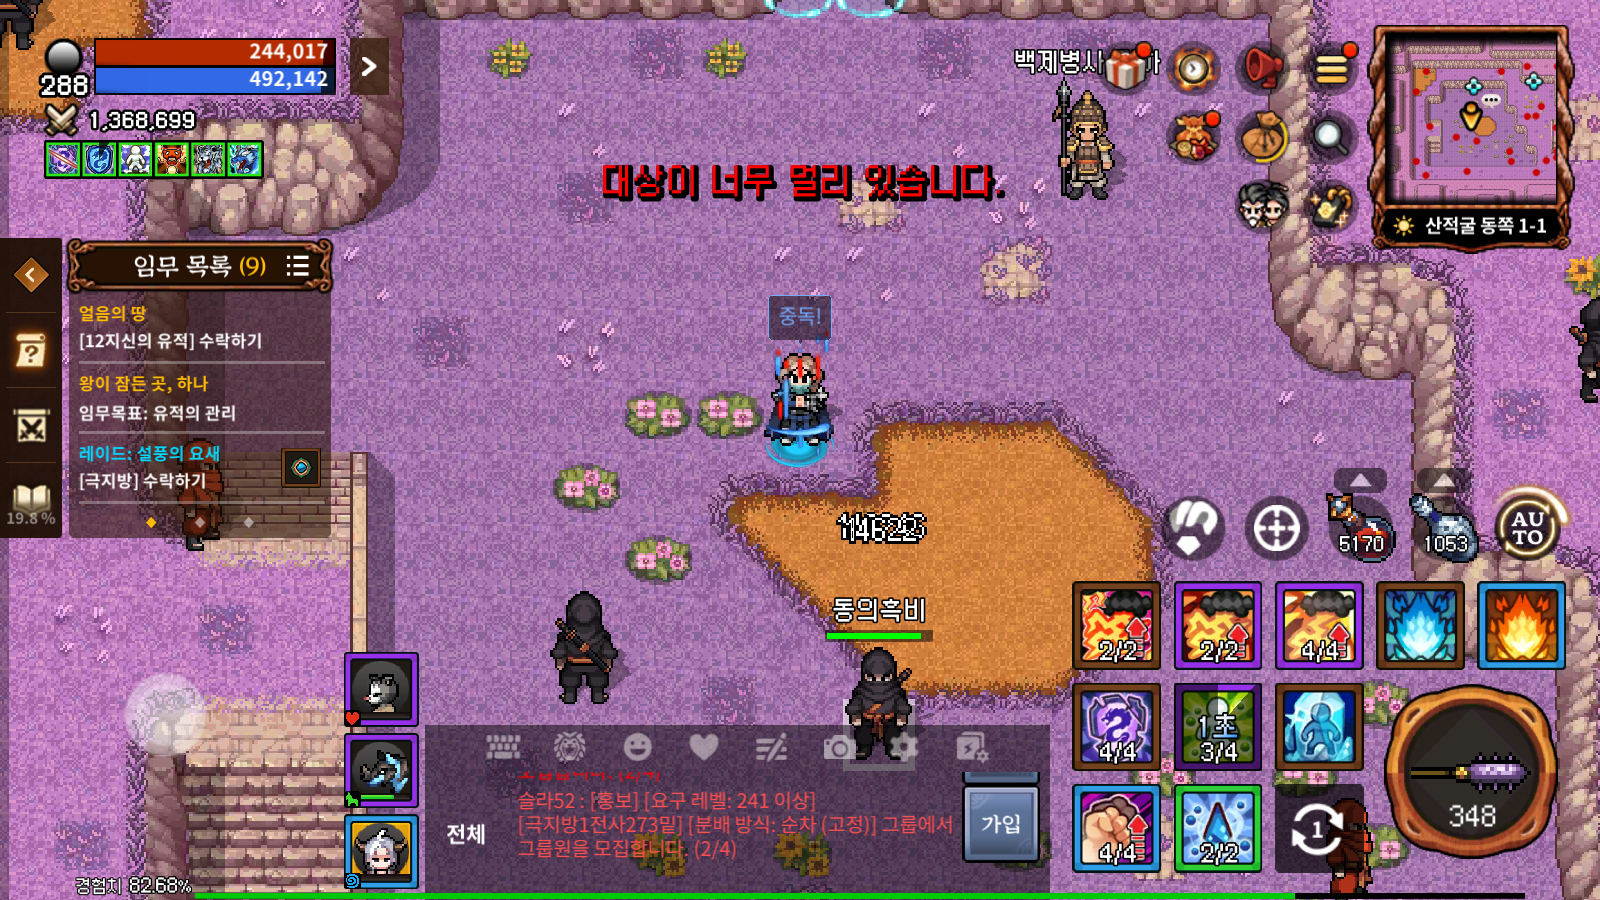

In [12]:
PIL.Image.open(str(normal[0]))

In [13]:
batch_size = 32
img_height = 180
img_width = 180

In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_root,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 800 files belonging to 2 classes.
Using 640 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_root,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 800 files belonging to 2 classes.
Using 160 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['death', 'normal']


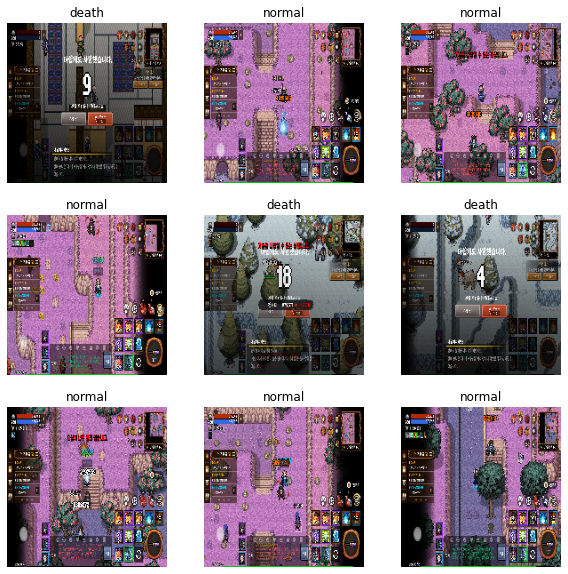

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [23]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [25]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
20/20 [==============================] - 23s 1s/step - loss: 0.1872 - accuracy: 0.9078 - val_loss: 0.0068 - val_accuracy: 0.9937
Epoch 2/10
20/20 [==============================] - 14s 676ms/step - loss: 0.0019 - accuracy: 0.9984 - val_loss: 1.2714e-04 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 12s 625ms/step - loss: 8.6889e-05 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 0.9937
Epoch 4/10
20/20 [==============================] - 13s 633ms/step - loss: 2.1295e-05 - accuracy: 1.0000 - val_loss: 6.8546e-06 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 15s 744ms/step - loss: 1.9167e-07 - accuracy: 1.0000 - val_loss: 2.1157e-06 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 22s 1s/step - loss: 2.7735e-07 - accuracy: 1.0000 - val_loss: 2.1514e-06 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 18s 900ms/step - loss: 2.4028e-07 - accuracy: 1.0000 - val_loss:

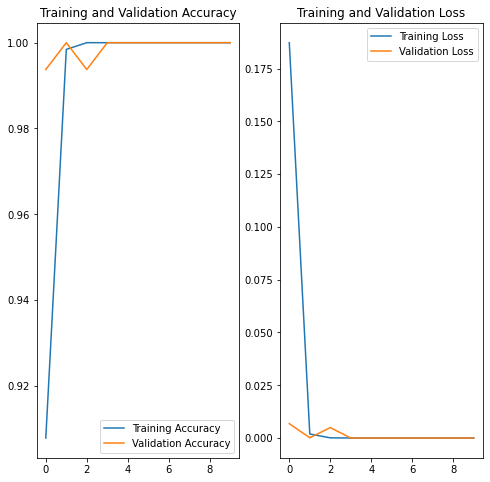

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import cv2
import telegram
from telegram.ext import Updater, CommandHandler
import threading
import pyautogui
from config import *
import numpy as np
import sys
import time

ID = '1431769181'
TOKEN =  '1400221552:AAHkkY8MWKaPYYT0T8VZ_rxvUBonyjYsA9g'

class TelegramBot:
    def __init__(self, name, token):
        self.core = telegram.Bot(token)
        self.updater = Updater(token)
        self.id = ID
        self.name = name

    def sendMessage(self,text):
        self.core.sendMessage(chat_id=self.id, text=text)
        
    def sendImage(self,img):
        self.core.send_photo(chat_id=self.id, photo=img)

    def stop(self):
        self.updater.start_polling()
        self.updater.dispatcher.stop()
        self.updater.job_queue.stop()
        self.updater.stop()
        
class BotHi(TelegramBot):
    def __init__(self):
        self.token = TOKEN
        TelegramBot.__init__(self, '하이', self.token)
        self.updater.stop()

    def add_handler(self, cmd, func):
        self.updater.dispatcher.add_handler(CommandHandler(cmd, func))
        
    def start(self):
        self.sendMessage('하이 봇이 잠에서 깨어납니다.')
        self.updater.start_polling()
        self.updater.idle()

def get_screencapture():
    pic=pyautogui.screenshot(region=(0,0,1280,720))
    img_frame=np.array(pic)
    img_frame = cv2.cvtColor(img_frame, cv2.COLOR_BGR2RGB)
    output_name = 'screen.png'
    cv2.imwrite(output_name, img_frame)
    return  output_name

def get_data(question):
    if question=='now':
        pic = pyautogui.screenshot(region=(0, 0, 1280, 720))
        return pic
    else:
        pic = pyautogui.screenshot(region=(0, 0, 1280, 720))
        return pic

def proc_monitor(bot, update):
    Baramybot.sendMessage('케릭터 모니터링 시작합니다.')
    Baramybot=threading.Thread(target=monitoring)
    Baramybot.start()

def proc_stop(bot, update):
    Baramybot.sendMessage('하이 봇이 잠듭니다.')
    Baramybot.stop()

def proc_screenshot(bot,update):
    Baramybot.sendMessage('현재 플레이되고 있는 화면입니다.')
    output=get_screencapture()
    Baramybot.sendImage(open(output,'rb'))
    
def proc_img(bot,update):
    dat=np.array(get_data('now'))
    dat = cv2.cvtColor(dat, cv2.COLOR_BGR2RGB)
    output='output.png'
    cv2.imwrite(output,dat)
    Baramybot.sendImage(open(output,'rb'))
    new_path=pathlib.Path('/Users/woori/output.png')
    img=keras.preprocessing.image.load_img(
        new_path, target_size=(img_height, img_width)
    )
    img_array=keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)
    score=tf.nn.softmax(predictions[0])
    
    if(class_names[np.argmax(score)]=='normal'):
        Baramybot.sendMessage("정상적으로 사냥중입니다.")
    elif(class_names[np.argmax(score)]=='death'):
        Baramybot.sendMessage("캐릭터가 사망하였습니다.")

def proc_dur(bot,update):
    repair_th = 4000000
    repair_gt = cv2.imread('repair.png', cv2.IMREAD_COLOR)
    repair_h,repair_w = repair_gt.shape[:2]
    pic = pyautogui.screenshot(region=(800, 0, 480, 360))
    img_frame = np.array(pic)
    img_frame = cv2.cvtColor(img_frame, cv2.COLOR_BGR2RGB)
    meth = 'cv2.TM_CCOEFF'
    method = eval(meth)
    res = cv2.matchTemplate(repair_gt, img_frame, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] +repair_w, top_left[1] + repair_h)
    x,y= top_left
    cropped_img = img_frame[y: y +repair_h, x: x + repair_w]
    #print(max_val, top_left)
    img_frame = cv2.rectangle(img_frame,top_left,bottom_right,(255,0,0))
    if (max_val > repair_th):
        cv2.imwrite('repairlog.png', img_frame)
        Baramybot.sendMessage("장비 내구도가 다 닳았습니다.")
    else:
        Baramybot.sendMessage("장비 내구도에 이상이 없습니다.")

Baramybot = BotHi()                 
Baramybot.add_handler('monitor', proc_screenshot)
Baramybot.add_handler('stop', proc_stop)
Baramybot.add_handler('now', proc_img)
Baramybot.add_handler('durability', proc_dur)
Baramybot.start()